In [71]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd #this is how I usually import pandas
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number

# Enable inline plotting
%matplotlib inline

import seaborn as sns; sns.set()

#sns.set_style("white")

import scipy.stats as stat
import os.path as path

In [84]:
resultFP = r'C:\Users\kumar\OneDrive\Desktop\Result131994147530781474.csv'
resultDF = pd.read_csv(resultFP)
resultDF.head()

,FileName,Alpha,CharRuleCount,MCBRuleCount,CharConditionCount,MCBConditionCount
0,wine-35,1.0,31,38,107,134
1,wine-35,0.9,31,38,107,134
2,wine-35,0.8,32,38,112,134
3,wine-35,0.7,34,38,125,134
4,wine-35,0.6,34,38,125,134


In [70]:
graphPath = r'C:\Users\kumar\OneDrive\Documents\Projects\CharMax\CharMax\Graphs'

'C:\\Users\\kumar\\OneDrive\\Documents\\Projects\\CharMax\\CharMax\\Graphs'

In [3]:
resultDF.head(10)

,FileName,Alpha,CharRuleCount,MCBRuleCount,CharConditionCount,MCBConditionCount
0,wine-35,1.0,31,24,97,84
1,wine-35,0.9,31,24,97,84
2,wine-35,0.8,32,24,102,84
3,wine-35,0.7,34,24,115,84
4,wine-35,0.6,34,24,115,84
5,wine-35,0.5,37,24,134,84
6,wine-35,0.4,37,24,134,84
7,wine-35,0.3,37,24,134,84
8,wine-35,0.2,33,24,111,84
9,wine-35,0.1,33,24,111,84


In [85]:
#list_data = [resultDF.loc[:"CharRule", "a"], resultDF.loc["2003":, "b"]]

testDF = resultDF.loc[resultDF['FileName'] == "wine-35"]

In [15]:
testDF["CharRuleCount"]

Series([], Name: CharRuleCount, dtype: int64)

In [37]:
ax = sns.lineplot(x='Alpha',y=['CharRuleCount','MCBRuleCount'], data=testDF)

AttributeError: module 'seaborn' has no attribute 'lineplot'

In [75]:
def GraphRule(testDF,File):
    fig = plt.figure(figsize=(8,5))
    plt.plot( 'Alpha', "CharRuleCount",data=testDF, marker='o', markerfacecolor='darkblue', markersize=4, color='blue',
         linewidth=1,label="CS")
    plt.plot( 'Alpha', 'MCBRuleCount', data=testDF, marker='*', color='Green', linewidth=1,label="MCB")
    plt.legend()
    plt.title(File+" - Rule Count")
    plt.xlabel("Paramter Alpha")
    plt.ylabel("Rule Count")
    plt.savefig(path.join(graphPath,File+"-Rule.png"))
    return



In [76]:
def GraphCondition(testDF,File):
    #f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)

    fig = plt.figure(figsize=(8,5))
    plt.plot( 'Alpha', "CharConditionCount",data=testDF, marker='o', markerfacecolor='darkblue',markersize=3, color='blue',
         linewidth=1,label="CS")
    plt.plot( 'Alpha', 'MCBConditionCount', data=testDF, marker='*', color='Green',markersize=3, linewidth=1,label="MCB")
    plt.legend()
    plt.title(File+" - Condition Count")
    plt.xlabel("Paramter Alpha")
    plt.ylabel("Condition Count")
    plt.savefig(path.join(graphPath,File+"-Cond.png"))
    #plt.subplot(1, 2, 2)
    return


In [52]:
stat.wilcoxon(x=testDF["CharRuleCount"],y=testDF["MCBRuleCount"],)

C:\Users\kumar\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


WilcoxonResult(statistic=10.5, pvalue=1.0)

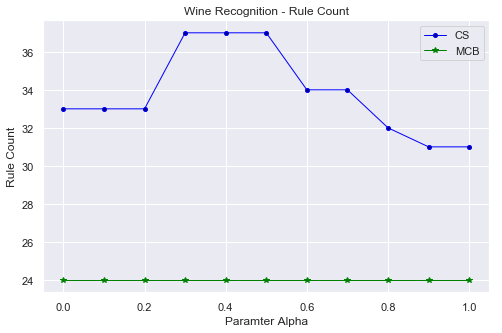

In [57]:
GraphRule(testDF,"Wine Recognition")

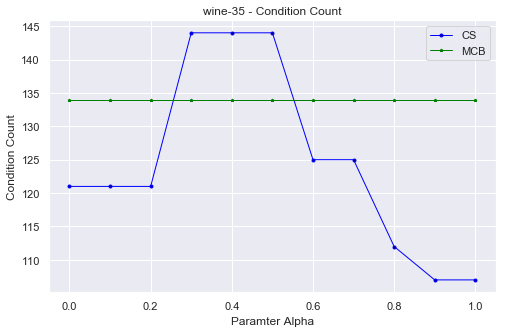

In [86]:

GraphCondition(testDF,"wine-35")


In [63]:
fileNames = resultDF.FileName.unique()


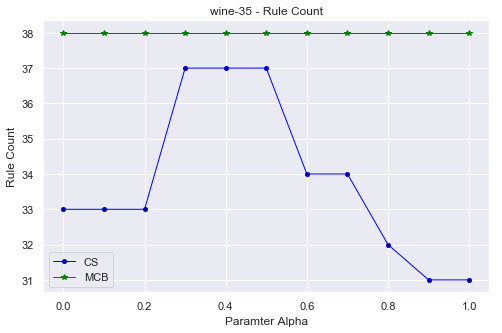

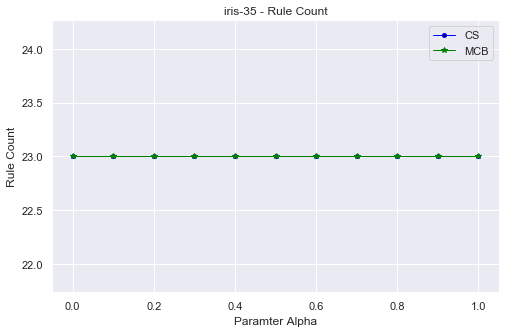

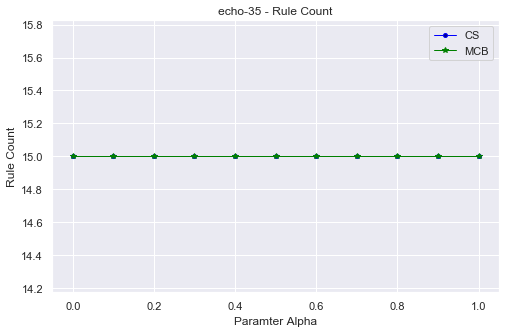

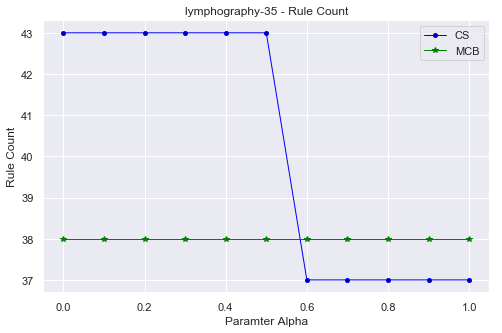

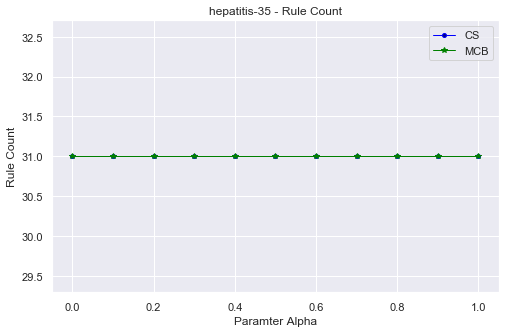

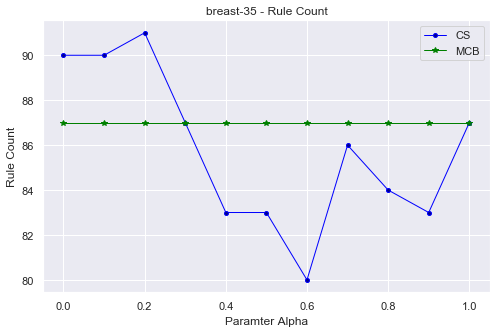

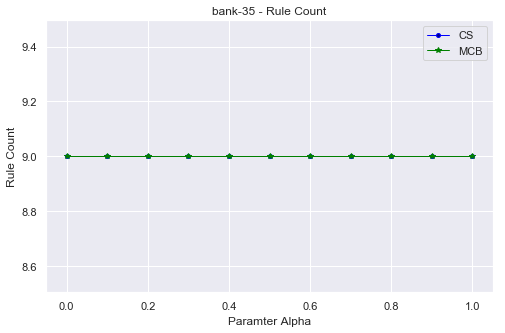

In [82]:
for file in fileNames:
    testDF = resultDF.loc[resultDF['FileName'] == file]
    GraphRule(testDF,file)

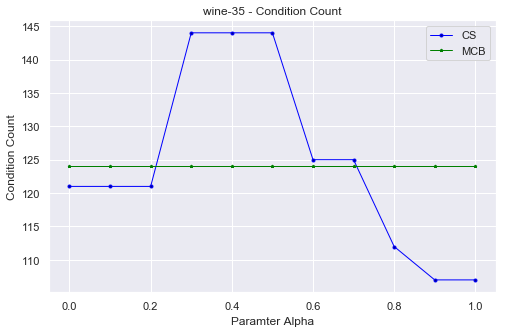

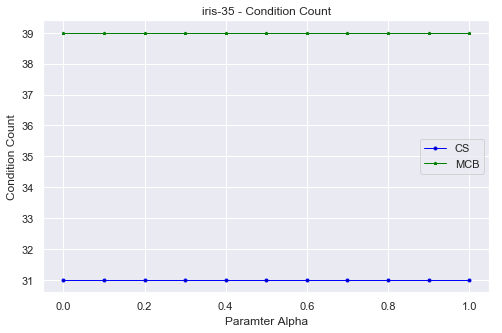

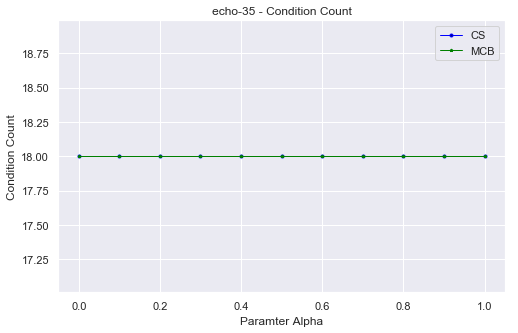

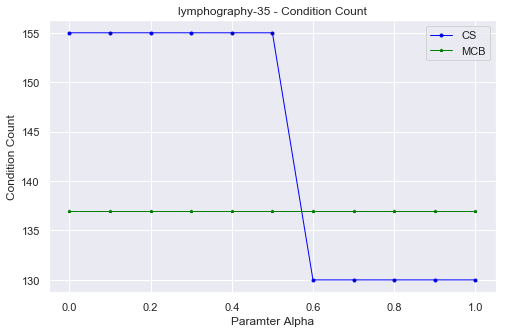

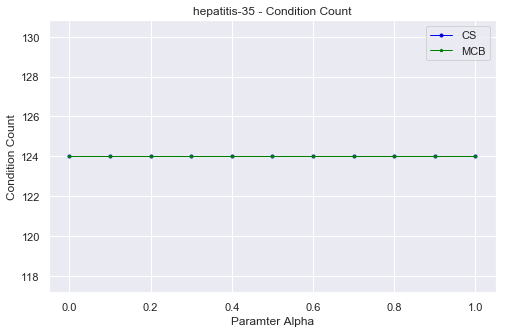

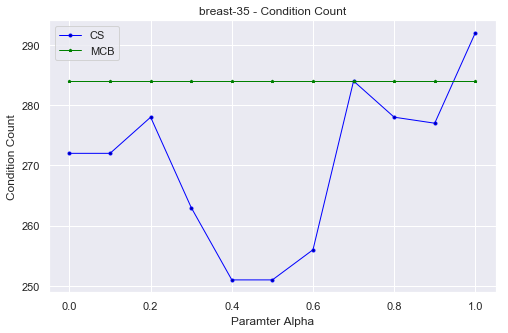

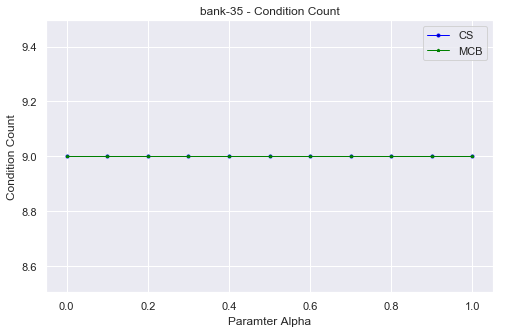

In [83]:
for file in fileNames:
    testDF = resultDF.loc[resultDF['FileName'] == file]
    GraphCondition(testDF,file)